In [ ]:
#American Electric Power (AEP)***
#CommonWealth Edison (ComEd)
#The Dayton Power and Light Company (DAYTON)
#Duke Energy Ohio/Kentucky (DEOK)
#Dominion Virginia Power (DOM)
#Duquesne Light Co. (DUQ)
#East kentucky Power Cooperative (EKPC)
#First Energy (FE)
#Northern Illinois Hub (IN)
#PJM East region: 2001-2018 (PJME)
#PJM West Region: 2001-2018 (PJMW)
#PJM Load Combined: 1998-2001 (PJM_load)




from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
plt.style.use('ggplot')



dataset_identifier = "robikscube/hourly-energy-consumption"

from google.colab import drive
drive.mount("/content/drive")

kaggle_creds_path = "/content/drive/My Drive/Dataset/kaggle.json"

! pip install kaggle --quiet

! mkdir ~/.kaggle
! cp "{kaggle_creds_path}" ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d {dataset_identifier}

! mkdir kaggle_data
! unzip "{dataset_identifier.split('/')[-1]}.zip" -d kaggle_data

drive.flush_and_unmount()



Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption
License(s): CC0-1.0
 61% 7.00M/11.4M [00:00<00:00, 70.9MB/s]
100% 11.4M/11.4M [00:00<00:00, 70.8MB/s]
Archive:  hourly-energy-consumption.zip
  inflating: kaggle_data/AEP_hourly.csv  
  inflating: kaggle_data/COMED_hourly.csv  
  inflating: kaggle_data/DAYTON_hourly.csv  
  inflating: kaggle_data/DEOK_hourly.csv  
  inflating: kaggle_data/DOM_hourly.csv  
  inflating: kaggle_data/DUQ_hourly.csv  
  inflating: kaggle_data/EKPC_hourly.csv  
  inflating: kaggle_data/FE_hourly.csv  
  inflating: kaggle_data/NI_hourly.csv  
  inflating: kaggle_data/PJME_hourly.csv  
  inflating: kaggle_data/PJMW_hourly.csv  
  inflating: kaggle_data/PJM_Load_hourly.csv  
  inflating: kaggle_data/est_hourly.paruqet  
  inflating: kaggle_data/pjm_hourly_est.csv  


**DATA EXPLORING**

In [ ]:
#Show PJM Regions
#Time of join and diffrent regions
from IPython.display import Image
Image(url= "http://slideplayer.com/4238181/14/images/4/PJM+Evolution.jpg")

In [ ]:
print(os.listdir('/content'))


['.config', 'hourly-energy-consumption.zip', 'kaggle_data', 'sample_data']


In [ ]:
df = pd.read_csv('/content/kaggle_data/AEP_hourly.csv')
df.dataframeName = 'AEP_hourly.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 121273 rows and 2 columns


In [ ]:
df.head()

#Shows Date,time and power usage of American Electricity Power in Megawatts

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [ ]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


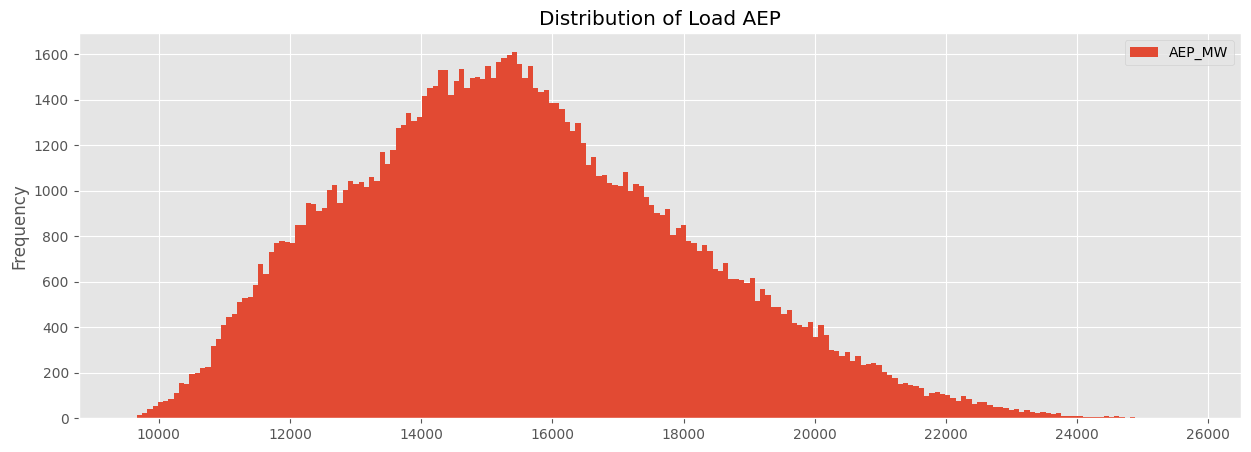

In [ ]:
_ = df.plot.hist(figsize=(15, 5), bins=200, title='Distribution of Load AEP')

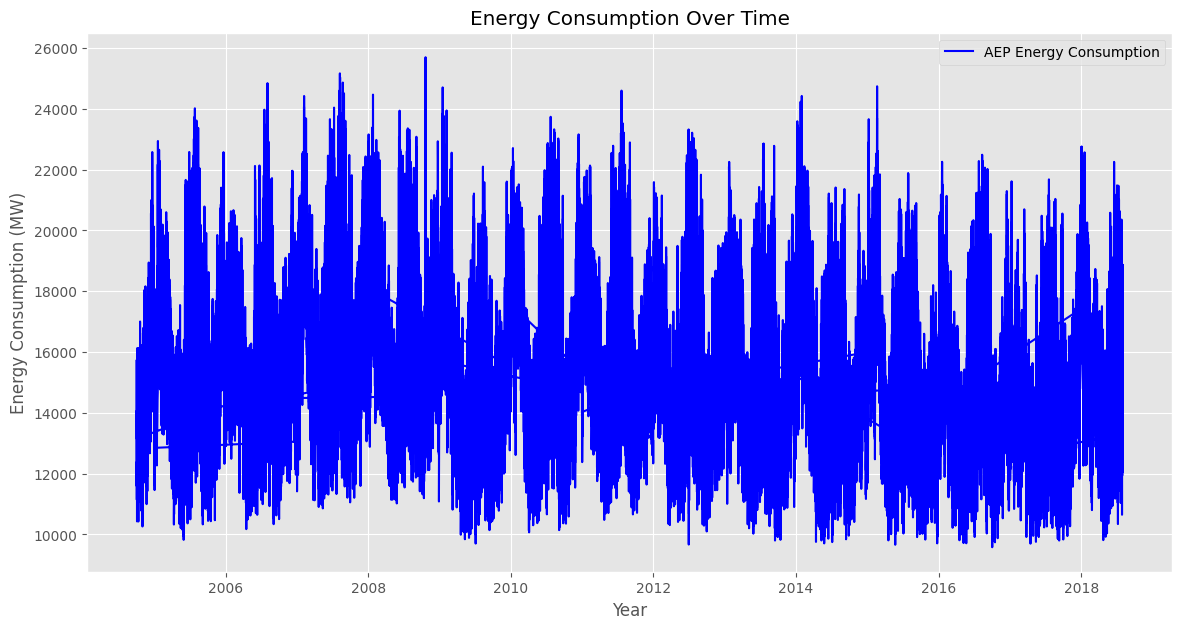

In [ ]:
df = pd.read_csv('../content/kaggle_data/AEP_hourly.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# energy consumption over time
plt.figure(figsize=(14, 7))
plt.plot(df['AEP_MW'], label='AEP Energy Consumption', color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()



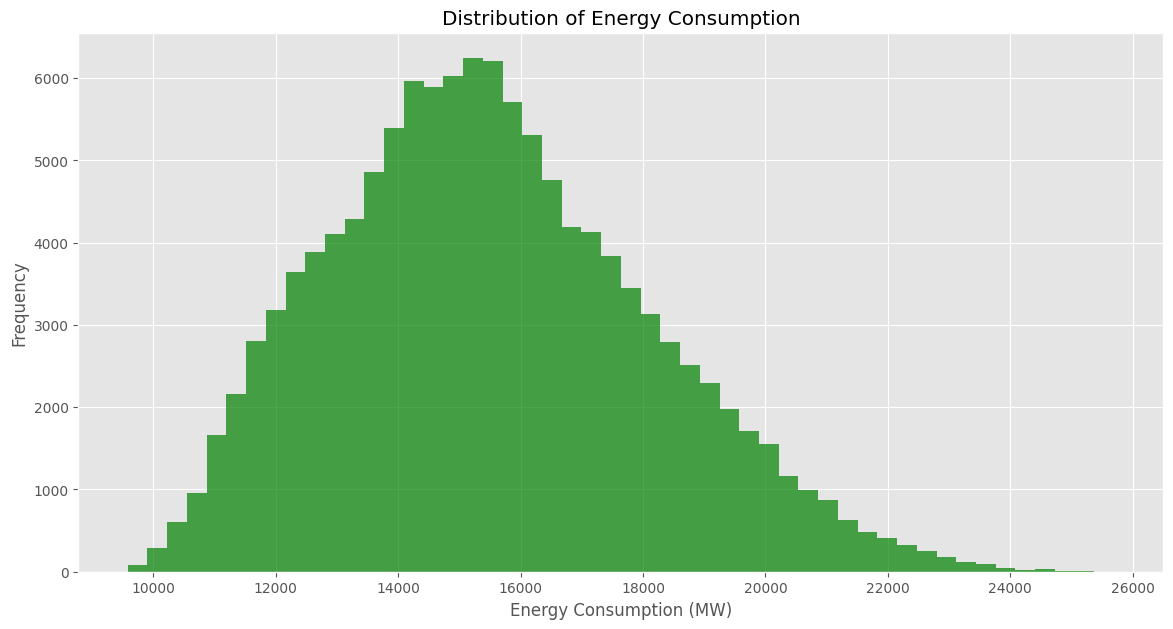

In [ ]:
plt.figure(figsize=(14, 7))
plt.hist(df['AEP_MW'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (MW)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
start_date = df.index.min()
end_date = df.index.max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2004-10-01 01:00:00
End Date: 2018-08-03 00:00:00


In [ ]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

print(df.head())

                      AEP_MW  hour  day_of_week  month
Datetime                                              
2004-12-31 01:00:00  13478.0     1            4     12
2004-12-31 02:00:00  12865.0     2            4     12
2004-12-31 03:00:00  12577.0     3            4     12
2004-12-31 04:00:00  12517.0     4            4     12
2004-12-31 05:00:00  12670.0     5            4     12


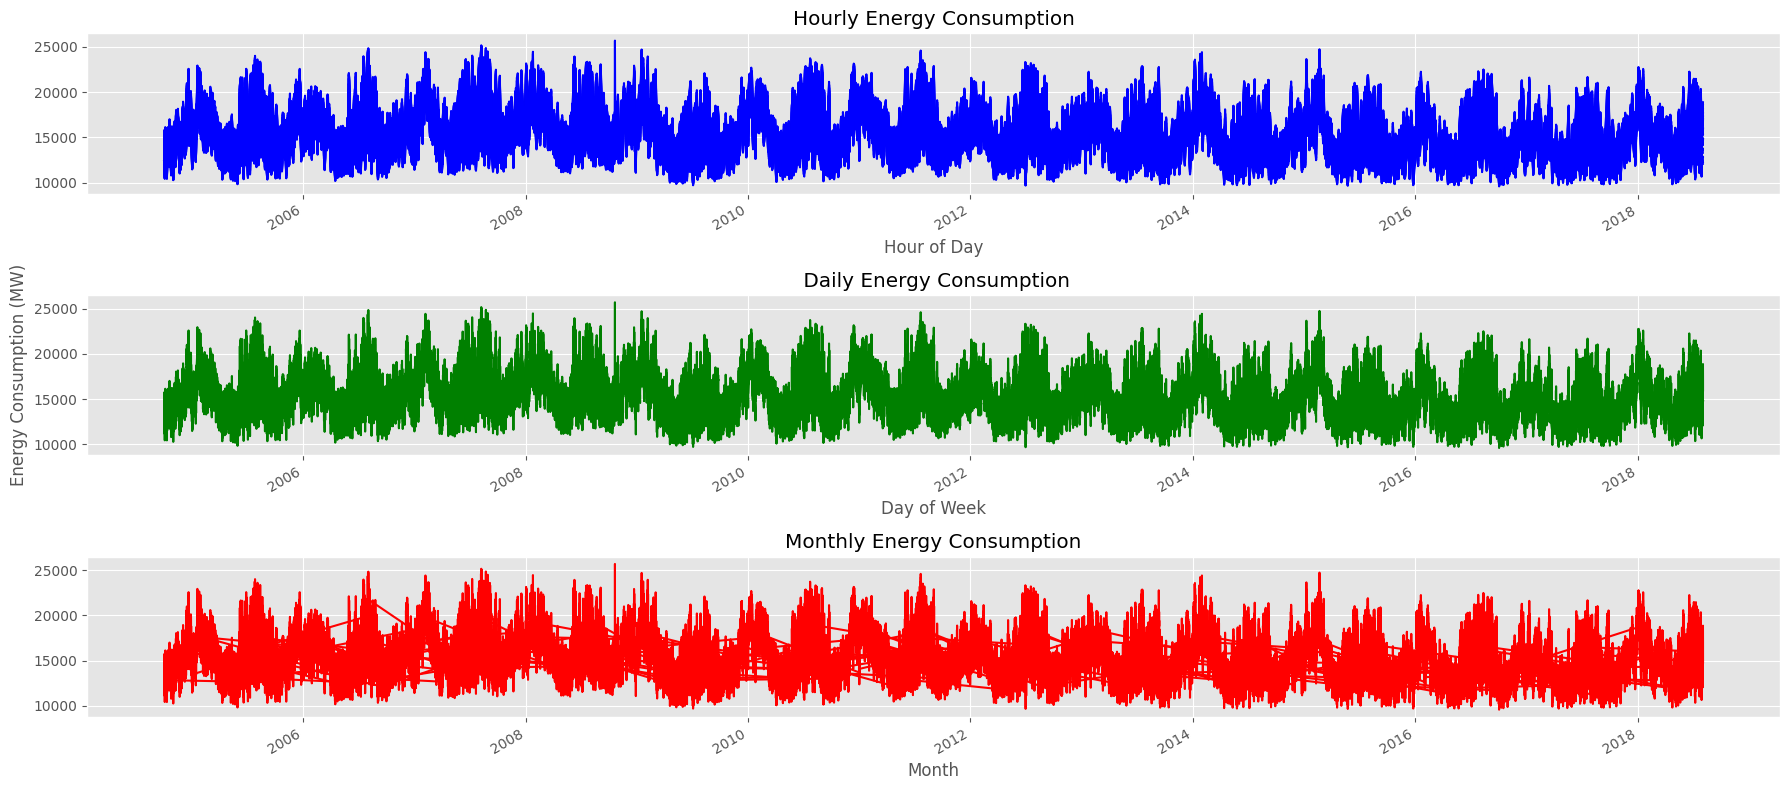

In [ ]:
hourly_ = df.groupby('hour')['AEP_MW']
daily_ = df.groupby('day_of_week')['AEP_MW']
monthly_ = df.groupby('month')['AEP_MW']


plt.figure(figsize=(18, 8))

# hourly
plt.subplot(3, 1, 1)
hourly_.plot(kind='line', color='blue')
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of Day')


# daily
plt.subplot(3, 1, 2)
daily_.plot(kind='line', color='green')
plt.title(' Daily Energy Consumption')
plt.xlabel('Day of Week')
plt.ylabel('Energy Consumption (MW)')

# monthly
plt.subplot(3, 1, 3)
monthly_.plot(kind='line', color='red')
plt.title('Monthly Energy Consumption')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

Text(0.5, 0, 'Hour of Day')

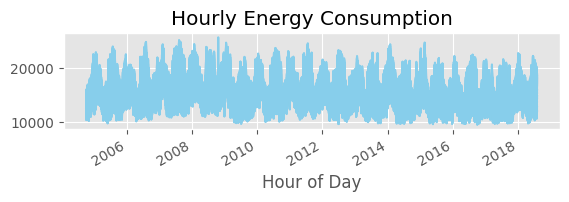

In [ ]:
plt.subplot(3, 1, 1)
hourly_.plot(kind='line', color='skyblue')
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of Day')


In [ ]:
df = df.sort_index()
filtered_df = df.loc['2017-01-01':'2017-12-31']

print(filtered_df.head())
print(filtered_df.tail())

                      AEP_MW  hour  day_of_week  month
Datetime                                              
2017-01-01 00:00:00  13240.0     0            6      1
2017-01-01 01:00:00  12876.0     1            6      1
2017-01-01 02:00:00  12591.0     2            6      1
2017-01-01 03:00:00  12487.0     3            6      1
2017-01-01 04:00:00  12369.0     4            6      1
                      AEP_MW  hour  day_of_week  month
Datetime                                              
2017-12-31 19:00:00  19608.0    19            6     12
2017-12-31 20:00:00  19442.0    20            6     12
2017-12-31 21:00:00  19323.0    21            6     12
2017-12-31 22:00:00  19092.0    22            6     12
2017-12-31 23:00:00  18877.0    23            6     12


In [ ]:
start_date = filtered_df.index.min()
end_date = filtered_df.index.max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2017-01-01 00:00:00
End Date: 2017-12-31 23:00:00


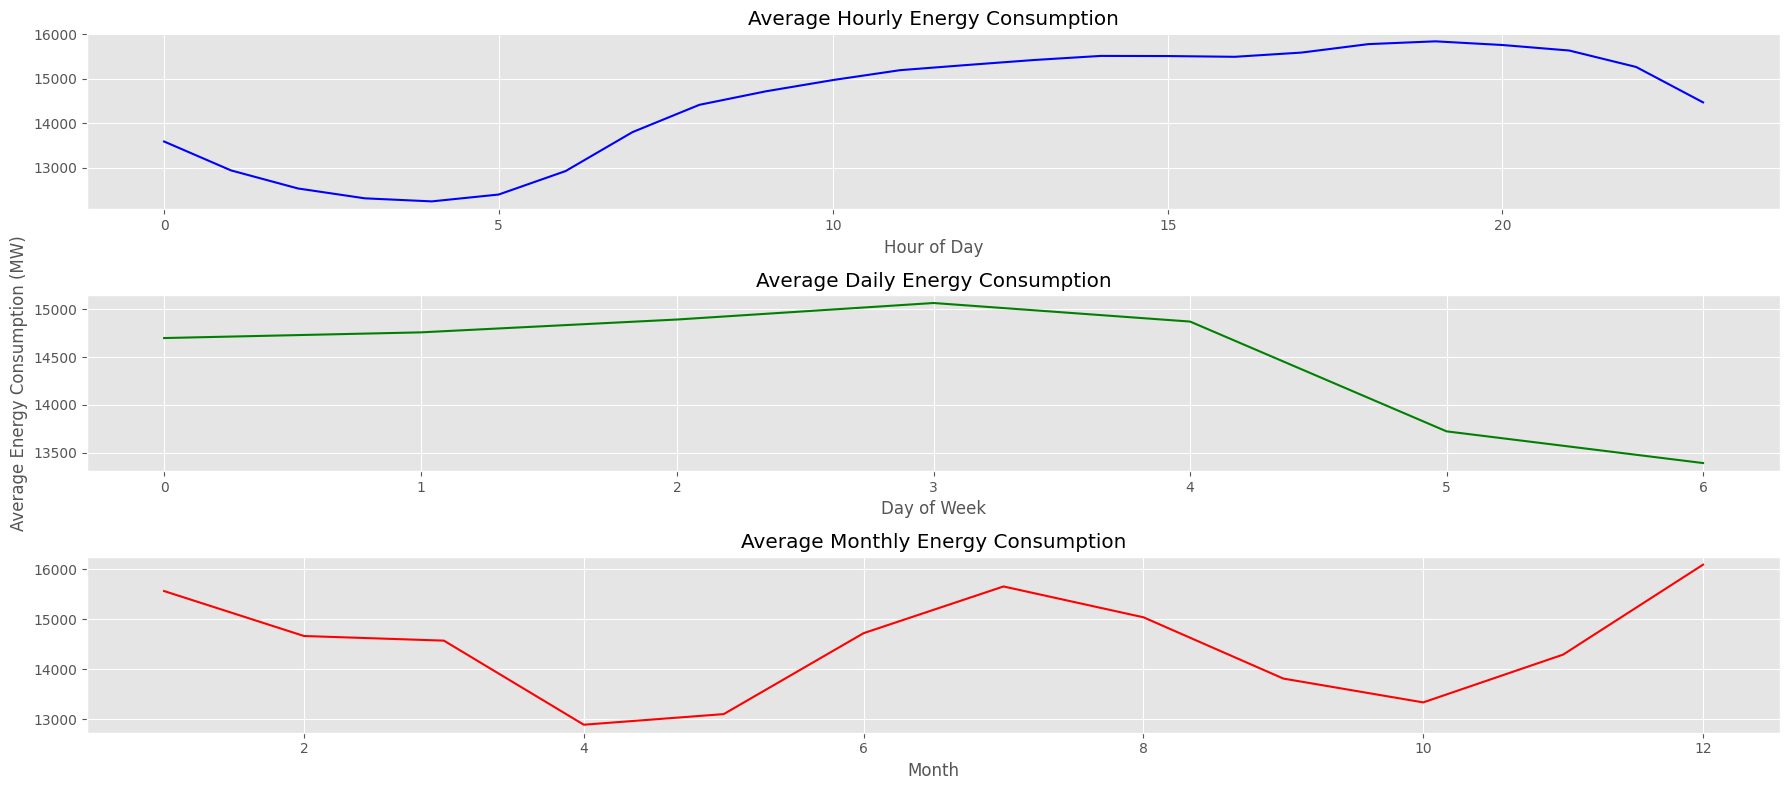

In [ ]:
hourly_avg = filtered_df.groupby('hour')['AEP_MW'].mean()
daily_avg = filtered_df.groupby('day_of_week')['AEP_MW'].mean()
monthly_avg = filtered_df.groupby('month')['AEP_MW'].mean()


plt.figure(figsize=(18, 8))

# hourly averages
plt.subplot(3, 1, 1)
hourly_avg.plot(kind='line', color='blue')
plt.title('Average Hourly Energy Consumption')
plt.xlabel('Hour of Day')


# daily averages
plt.subplot(3, 1, 2)
daily_avg.plot(kind='line', color='green')
plt.title('Average Daily Energy Consumption')
plt.xlabel('Day of Week')
plt.ylabel('Average Energy Consumption (MW)')

# monthly averages
plt.subplot(3, 1, 3)
monthly_avg.plot(kind='line', color='red')
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')


plt.tight_layout()
plt.show()

After looking at the data I realized I want to only use data from 2012 to 2017. Only focusing on Hour of day prediction. I will be using the RNN (LSTM) algorithm. I will also split the data 75/25 which means data from Jan 2017 to Sep 2017 will be used to train and October to December 2017 will be used as test set.

**Splitting and Building the Model**

In [ ]:
filtered_df = df.loc['2017-01-01':'2017-12-31']

# training and testing
train = filtered_df.loc['2017-01-01':'2017-09-30']
test = filtered_df.loc['2017-10-01':'2017-12-31']


print("Training Set Preview:")
print(train.head())
print("\nTesting Set Preview:")
print(test.head())


Training Set Preview:
                      AEP_MW  hour  day_of_week  month
Datetime                                              
2017-01-01 00:00:00  13240.0     0            6      1
2017-01-01 01:00:00  12876.0     1            6      1
2017-01-01 02:00:00  12591.0     2            6      1
2017-01-01 03:00:00  12487.0     3            6      1
2017-01-01 04:00:00  12369.0     4            6      1

Testing Set Preview:
                      AEP_MW  hour  day_of_week  month
Datetime                                              
2017-10-01 00:00:00  10948.0     0            6     10
2017-10-01 01:00:00  10460.0     1            6     10
2017-10-01 02:00:00  10060.0     2            6     10
2017-10-01 03:00:00   9960.0     3            6     10
2017-10-01 04:00:00   9835.0     4            6     10


In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train[['AEP_MW']])
test_scaled = scaler.transform(test[['AEP_MW']])

train_scaled = pd.DataFrame(train_scaled, columns=['AEP_MW'], index=train.index)
test_scaled = pd.DataFrame(test_scaled, columns=['AEP_MW'], index=test.index)

print("Scaled Training Set Preview:")
print(train_scaled.head())
print("\nScaled Testing Set Preview:")
print(test_scaled.head())


Scaled Training Set Preview:
                       AEP_MW
Datetime                     
2017-01-01 00:00:00  0.295659
2017-01-01 01:00:00  0.265275
2017-01-01 02:00:00  0.241486
2017-01-01 03:00:00  0.232805
2017-01-01 04:00:00  0.222955

Scaled Testing Set Preview:
                       AEP_MW
Datetime                     
2017-10-01 00:00:00  0.104341
2017-10-01 01:00:00  0.063606
2017-10-01 02:00:00  0.030217
2017-10-01 03:00:00  0.021870
2017-10-01 04:00:00  0.011436


In [ ]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(data)):
        X.append(data[i-n_steps:i, 0])  # get input
        y.append(data[i, 0])           # predict (Target value)
    return np.array(X), np.array(y)

n_steps = 24  # im using 24 hours here because this will be much better

X_train, y_train = create_sequences(train_scaled.values, n_steps)
X_test, y_test = create_sequences(test_scaled.values, n_steps)

# Reshape RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


**Model RNN (LSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0612
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0153
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0026
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0019
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0016
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0013
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0010
Epoch 9/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.7517e-04
Epoch 10/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 9.1154e-04
Epoch 11/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.8284e-04
Epoch 12/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 6.3383e-04
Epoch 13/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 6.4578e-04
Epoch 14/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 6.5898e-04
Epoch 15/20
204/204

In [ ]:
predicted_values = model.predict(X_test)
predicted_values = scaler.inverse_transform(predicted_values)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate MSE
mse = mean_squared_error(y_test_original, predicted_values)
# Calculate RMSE
rmse = sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 89148.64778478608
Root Mean Squared Error: 298.5777081176458


**Great! The model produced MSE: 180240.76 and RMSE: 424.54. Lets look to compare to the actual data we have.**

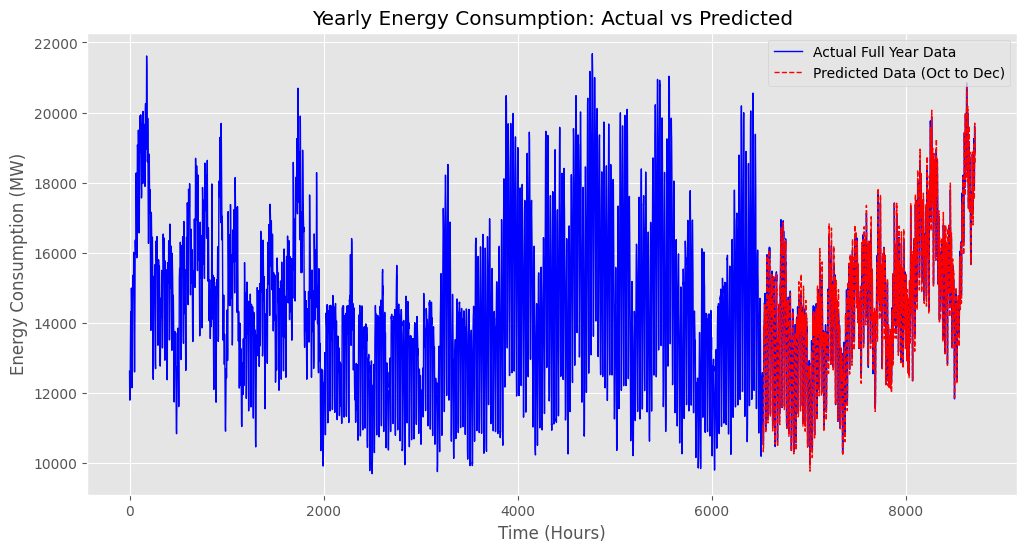

In [ ]:
# (8766 hours)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

full_year_actual = np.concatenate((y_train_original, y_test_original), axis=0)

full_year_predictions = np.full_like(full_year_actual, fill_value=np.nan)

full_year_predictions[-len(predicted_values):] = predicted_values

plt.figure(figsize=(12, 6))
plt.plot(full_year_actual, label='Actual Full Year Data', color='blue', linewidth=1)
plt.plot(full_year_predictions, label='Predicted Data (Oct to Dec)', color='red', linestyle='--', linewidth=1)
plt.title('Yearly Energy Consumption: Actual vs Predicted')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()


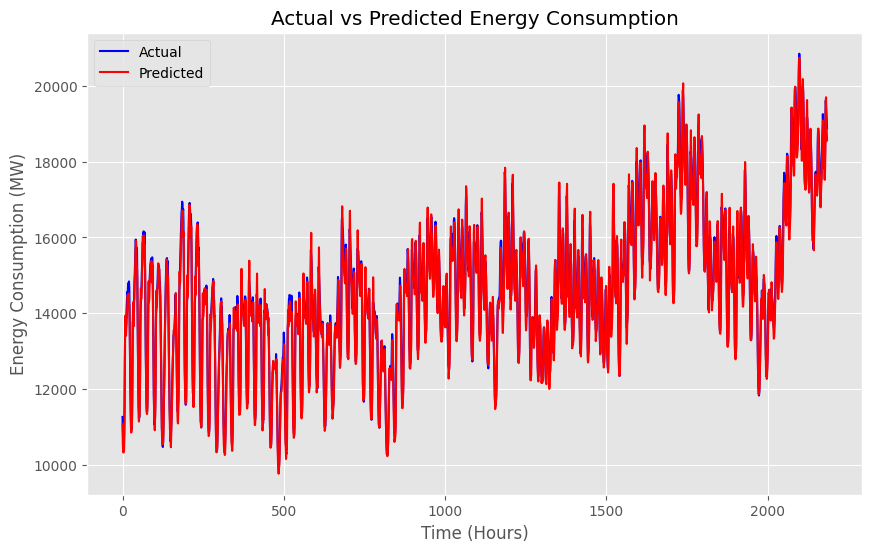

In [ ]:
# Plotting the actual vs predicted values (2208 hours)
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

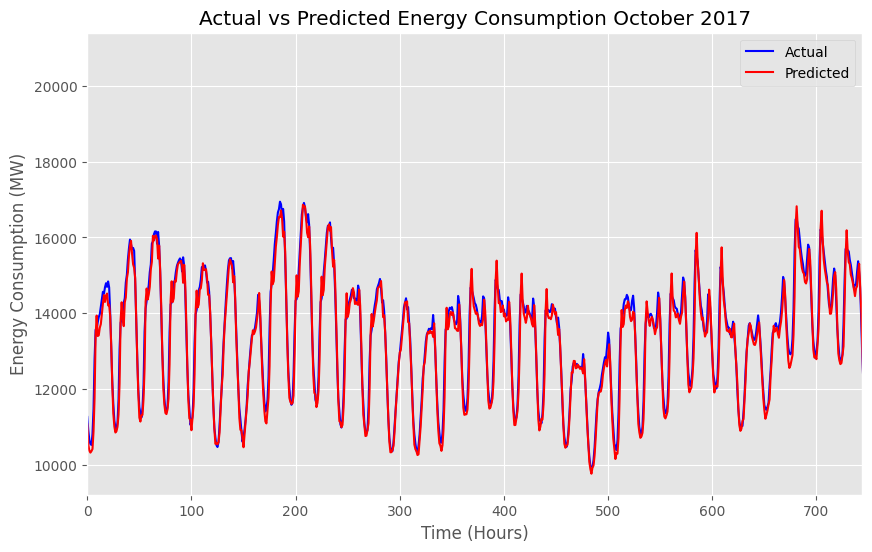

In [ ]:
# MONTH 1 (October)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Actual vs Predicted Energy Consumption October 2017')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.xlim(0, 744)
plt.show()


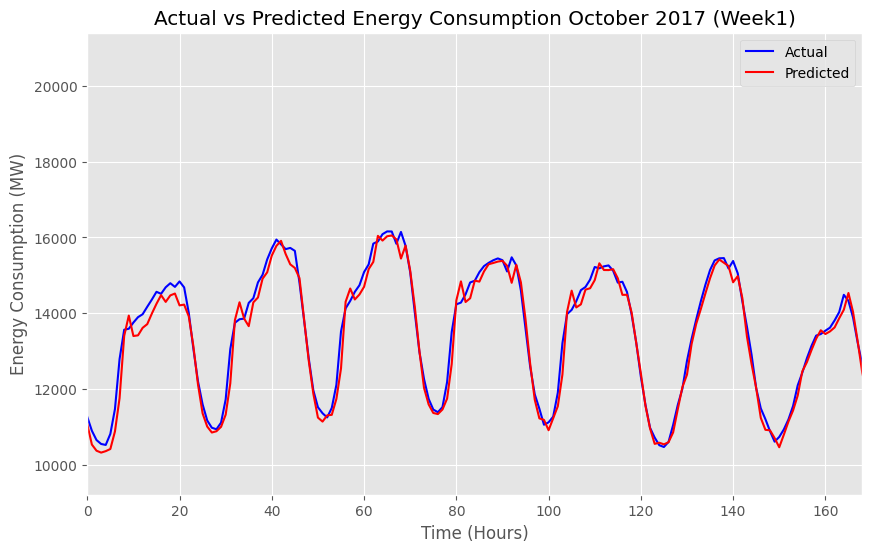

In [ ]:
# Month October week 1

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Actual vs Predicted Energy Consumption October 2017 (Week1)')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.xlim(0, 168)
plt.show()


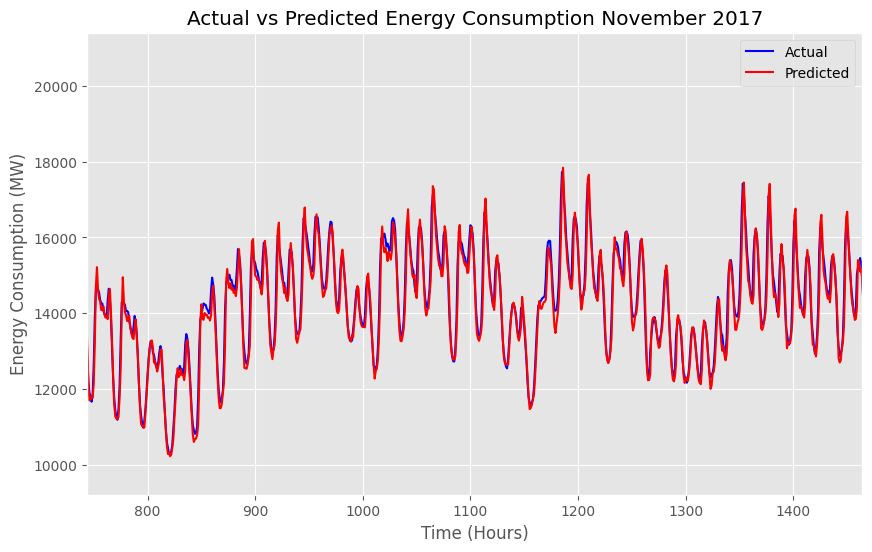

In [ ]:
# MoNTH 2 (November)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Actual vs Predicted Energy Consumption November 2017')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.xlim(744, 1464)
plt.show()


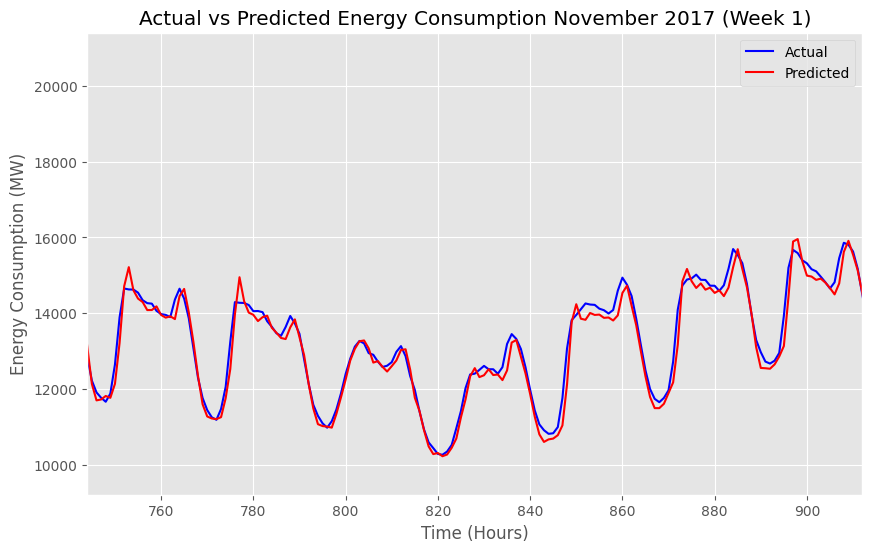

In [ ]:
# MoNTH 2 (November) Week 1

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Actual vs Predicted Energy Consumption November 2017 (Week 1)')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.xlim(744, 912)
plt.show()


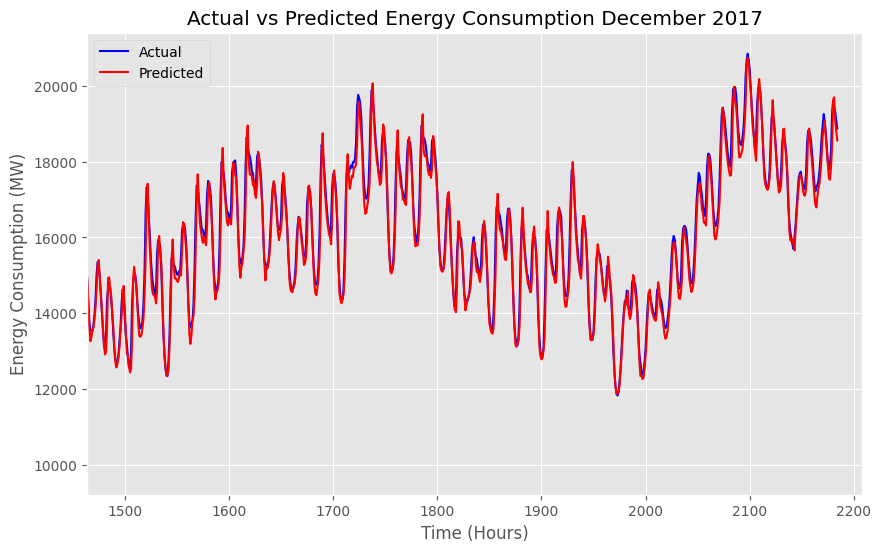

In [ ]:
# MONTH 3 (December)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Actual vs Predicted Energy Consumption December 2017')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.xlim(1464,2208)
plt.show()


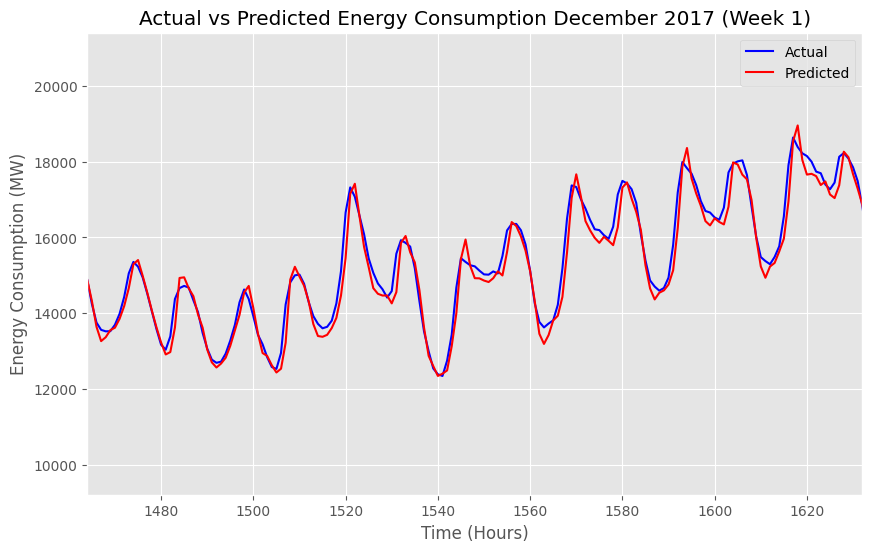

In [ ]:
# MONTH 3 (December) Week 1

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(predicted_values, label='Predicted', color='red')
plt.title('Actual vs Predicted Energy Consumption December 2017 (Week 1)')
plt.xlabel('Time (Hours)')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.xlim(1464,1632)
plt.show()


In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions_actual = scaler.inverse_transform(train_predictions)
test_predictions_actual = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

mse_train = mean_squared_error(y_train_actual, train_predictions_actual)
mse_test = mean_squared_error(y_test_actual, test_predictions_actual)

print(f'Train MSE: {mse_train}')
print(f'Test MSE: {mse_test}')


204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train MSE: 82898.95799836518
Test MSE: 89148.64778478608


Already from the graph we can see that the model is already doing so well in the prediction. After doing the calculation we can confidently say that the Test model is performing wonderfully, comparing them 183764.58 to 180240.76.This is very close to the actual data!!

In [ ]:
from sklearn.metrics import mean_absolute_error
def mean_absolute_percentage_error(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    return mape

mape = mean_absolute_percentage_error(y_test_original, predicted_values)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


mae = mean_absolute_error(y_test_original, predicted_values)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Percentage Error (MAPE): 1.4861826484852994%
Mean Absolute Error (MAE): 218.5641304347826


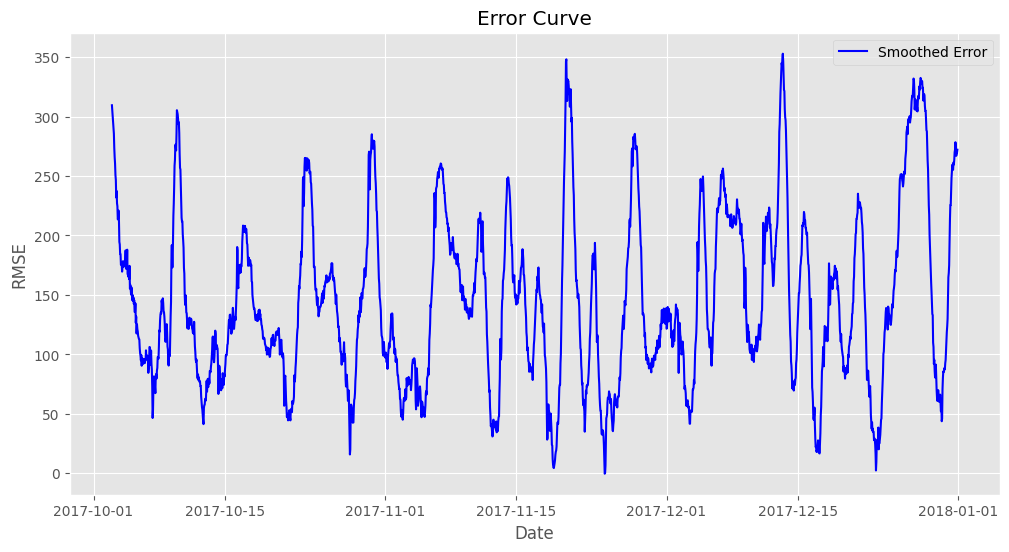

In [ ]:
errors = y_test_original.flatten() - predicted_values.flatten()


error_df = pd.DataFrame({
    'Datetime': test.index[n_steps:],
    'Error': errors
})


error_df['Smoothed_Error'] = error_df['Error'].rolling(window=24).mean()


plt.figure(figsize=(12, 6))
plt.plot(error_df['Datetime'], error_df['Smoothed_Error'], label='Smoothed Error', color='blue')
plt.xlabel('Date')
plt.ylabel('RMSE')
plt.title('Error Curve')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
errors = y_test_original.flatten() - predicted_values.flatten()


results_df = pd.DataFrame({
    'timestamp': test.index[n_steps:],
    'original_values': y_test_original.flatten(),
    'LSTM_predicted_values': predicted_values.flatten(),
    'LSTM_errors': errors
})


results_df['LSTM_smoothed_errors'] = results_df['LSTM_errors'].rolling(window=24).mean()


drive.mount('/content/drive')
results_path = '/content/drive/My Drive/LSTM_model_predictions.csv'
if os.path.exists(results_path):
    existing_results_df = pd.read_csv(results_path)
    updated_results_df = pd.concat([existing_results_df, results_df], ignore_index=True)
    updated_results_df.to_csv(results_path, index=False)
else:
    results_df.to_csv(results_path, index=False)
drive.flush_and_unmount()

Mounted at /content/drive
